# Project 3 A

## Configuration Items

In [0]:
#!pip install ydata-profiling
#!pip install config

In [0]:
# Standard Libraries
import io

# External Libraries
import requests
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from pprint import pprint
api_key = '7Jhx8cTKDGhalquktS2BCKjtnxQ8iboDpbuTP4Tk'
import os

## Exploritory Data Analysis

## Load the data

In [0]:
#The College Scorecard API is a GET API that lives at http://api.data.gov/ed/collegescorecard/
#The endpoint for querying all data is /v1/schools
base_url = "https://api.data.gov/ed/collegescorecard/v1/schools?"
base_url = f"{base_url}api_key={api_key}&fields="
base_url

'https://api.data.gov/ed/collegescorecard/v1/schools?api_key=7Jhx8cTKDGhalquktS2BCKjtnxQ8iboDpbuTP4Tk&fields='

In [0]:
# List of all the search conditions
parameters = ["&school.degrees_awarded.predominant=3",
             #"&school.institutional_characteristics.level=1",
             "&school.operating=1"
             ]

# Appending all the conditions values to construct the conditionss_url
parameters_url = ""
for parameter in parameters:
    parameters_url = parameters_url + parameter
parameters_url

'&school.degrees_awarded.predominant=3&school.operating=1'

In [0]:
# Dictionary all the desired fields
year = "latest"
fields = {
          # School Category
          "School Name": "school.name",
          "School ID": "id",
          "School State": "school.state",
          "School Ownership": "school.ownership",
          "Full-time Faculty Rate (%)": "school.ft_faculty_rate",
          "Faculty's average salary per month": "school.faculty_salary",
          "Predominant Degrees Awarded": "school.degrees_awarded.predominant",
          #"Institutional Characteristics": "school.institutional_characteristics.level",
          "School Operating": "school.operating",
          # Student Category
          "Student Enrollment Size": year + ".student.size",
          "Student Enrollment All": year + ".student.enrollment.all",
          "Male Students (%)": year + ".student.demographics.men",
          "Female Students (%)": year + ".student.demographics.women",
          "Retention Rate 4Yr (%)": year + ".student.retention_rate.four_year.full_time",
          #Cost Category
          "Attendance Cost per Academic Year": year + ".cost.attendance.academic_year",
          # Completion Category
          "150% Completion Rate at 4Yr (%)": year + ".completion.completion_rate_4yr_150nt",
          # Admissions Category 
          "Admission Rate (%)": year + ".admissions.admission_rate.overall",
          "SAT Average Overall": year + ".admissions.sat_scores.average.overall",
          "SAT 75th Percentile Critical Math": year + ".admissions.sat_scores.75th_percentile.math",
          "SAT 75th Percentile Critical Reading": year + ".admissions.sat_scores.75th_percentile.critical_reading",
          "SAT 75th Percentile Critical Writing": year + ".admissions.sat_scores.75th_percentile.writing",
          ## Earnings Category
          # 6 Years after Enrollment:
          "Mean Earnings (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings",
          "Mean Male Earnings (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.male_students",
          "Mean Female Earnings (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.female_students",
          "Standard Deviation Earning (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.std_dev",
          "Percent of Students Earning >$25K (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.percent_greater_than_25000",
          "Low Income Students (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.income.lowest_tercile",
          "Medium Income Students (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.income.middle_tercile",
          "High Income Students (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.working_not_enrolled.income.highest_tercile",
          "Mean Earnings Low (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.lowest_tercile",
          "Mean Earnings Medium (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.middle_tercile",
          "Mean Earnings High (6 Yrs after Entry)": year + ".earnings.6_yrs_after_entry.mean_earnings.highest_tercile",
          # 10 Years after Enrollment:
          "Mean Earnings (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.working_not_enrolled.mean_earnings",
          "Mean Male Earnings (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.mean_earnings.male_students",
          "Mean Female Earnings (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.mean_earnings.female_students",
          "Standard Deviation Earning (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.working_not_enrolled.std_dev",
          "Percent of Students Earning >$25K (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.percent_greater_than_25000",
          "Low Income Students (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.working_not_enrolled.income.lowest_tercile",
          "Medium Income Students (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.working_not_enrolled.income.middle_tercile",
          "High Income Students (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.working_not_enrolled.income.highest_tercile",
          "Mean Earnings Low (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.mean_earnings.lowest_tercile",
          "Mean Earnings Medium (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.mean_earnings.middle_tercile",
          "Mean Earnings High (10 Yrs after Entry)": year + ".earnings.10_yrs_after_entry.mean_earnings.highest_tercile"
         }

# Appending all the fields values to construct the fields_url
fields_url = ""
for key, val in fields.items():
    fields_url = fields_url + val + ","

# To remove the extra "," at the end of fields_url
fields_url = fields_url[:-1]
fields_url

'school.name,id,school.state,school.ownership,school.ft_faculty_rate,school.faculty_salary,school.degrees_awarded.predominant,school.operating,latest.student.size,latest.student.enrollment.all,latest.student.demographics.men,latest.student.demographics.women,latest.student.retention_rate.four_year.full_time,latest.cost.attendance.academic_year,latest.completion.completion_rate_4yr_150nt,latest.admissions.admission_rate.overall,latest.admissions.sat_scores.average.overall,latest.admissions.sat_scores.75th_percentile.math,latest.admissions.sat_scores.75th_percentile.critical_reading,latest.admissions.sat_scores.75th_percentile.writing,latest.earnings.6_yrs_after_entry.working_not_enrolled.mean_earnings,latest.earnings.6_yrs_after_entry.mean_earnings.male_students,latest.earnings.6_yrs_after_entry.mean_earnings.female_students,latest.earnings.6_yrs_after_entry.working_not_enrolled.std_dev,latest.earnings.6_yrs_after_entry.percent_greater_than_25000,latest.earnings.6_yrs_after_entry.workin

In [0]:
# Getting number of records returned to set the max page number
query_url = f"{base_url}{fields_url}{parameters_url}&page=0"
response = requests.get(query_url).json()
#response
max_page_num = response["metadata"]["total"]//100 + 1
max_page_num

20

In [0]:
# Constructing the dataframe from the API request response

#Initializing variables
school_df = []
per_page = 100

for page_num in range(0,max_page_num):
    query_url = f"{base_url}{fields_url}{parameters_url}&page={page_num}&_per_page={per_page}"
    response = requests.get(query_url).json()
    
    for x in range(len(response["results"])):
        result_row = {}
        
        for key, val in fields.items(): 
            try:
                result_row[key] = response["results"][x][val]
            except KeyError:
                print(f"{key} key not found")
                
        school_df.append(result_row)

        
school_df = pd.DataFrame(school_df)

## Data Cleansing

In [0]:
# Updating School Ownership 1: "Public", 2: "Private NonProfit", 3: "Private ForProfit"}
school_df.loc[school_df["School Ownership"] == 1, "School Ownership"] = "Public"
school_df.loc[school_df["School Ownership"] == 2, "School Ownership"] = "Private NonProfit"
school_df.loc[school_df["School Ownership"] == 3, "School Ownership"] = "Private ForProfit"

In [0]:
# Formatting the Percentage columns
school_df["Admission Rate (%)"] = school_df["Admission Rate (%)"] * 100
school_df["150% Completion Rate at 4Yr (%)"] = school_df["150% Completion Rate at 4Yr (%)"] * 100
school_df["Retention Rate 4Yr (%)"] = school_df["Retention Rate 4Yr (%)"] * 100
school_df["Full-time Faculty Rate (%)"] = school_df["Full-time Faculty Rate (%)"] * 100
school_df["Percent of Students Earning >$25K (6 Yrs after Entry)"] = school_df["Percent of Students Earning >$25K (6 Yrs after Entry)"] * 100
school_df["Percent of Students Earning >$25K (10 Yrs after Entry)"] = school_df["Percent of Students Earning >$25K (10 Yrs after Entry)"] * 100
school_df["Male Students (%)"] = school_df["Male Students (%)"] * 100
school_df["Female Students (%)"] = school_df["Female Students (%)"] * 100

pd.options.display.float_format = '{:.2f}'.format

Convert to Spark format to get full benefit of Spark.

In [0]:
sDF = sqlContext.createDataFrame(school_df)

sDF.write.format("parquet").mode("overwrite").save("dbfs:/FileStore/shared_uploads/michael.wacey@gwu.edu/Project3A_1.parquet")

In [0]:
sDF.createOrReplaceTempView("sDF")
display(sDF)

School Name,School ID,School State,School Ownership,Full-time Faculty Rate (%),Faculty's average salary per month,Predominant Degrees Awarded,School Operating,Student Enrollment Size,Student Enrollment All,Male Students (%),Female Students (%),Retention Rate 4Yr (%),Attendance Cost per Academic Year,150% Completion Rate at 4Yr (%),Admission Rate (%),SAT Average Overall,SAT 75th Percentile Critical Math,SAT 75th Percentile Critical Reading,SAT 75th Percentile Critical Writing,Mean Earnings (6 Yrs after Entry),Mean Male Earnings (6 Yrs after Entry),Mean Female Earnings (6 Yrs after Entry),Standard Deviation Earning (6 Yrs after Entry),Percent of Students Earning >$25K (6 Yrs after Entry),Low Income Students (6 Yrs after Entry),Medium Income Students (6 Yrs after Entry),High Income Students (6 Yrs after Entry),Mean Earnings Low (6 Yrs after Entry),Mean Earnings Medium (6 Yrs after Entry),Mean Earnings High (6 Yrs after Entry),Mean Earnings (10 Yrs after Entry),Mean Male Earnings (10 Yrs after Entry),Mean Female Earnings (10 Yrs after Entry),Standard Deviation Earning (10 Yrs after Entry),Percent of Students Earning >$25K (10 Yrs after Entry),Low Income Students (10 Yrs after Entry),Medium Income Students (10 Yrs after Entry),High Income Students (10 Yrs after Entry),Mean Earnings Low (10 Yrs after Entry),Mean Earnings Medium (10 Yrs after Entry),Mean Earnings High (10 Yrs after Entry)
Alabama A & M University,100654,AL,Public,70.56,8651.0,3,1,5196,0,40.550000000000004,59.45,59.28,23167,26.779999999999998,68.4,920.0,510.0,523.0,457.0,28400,30000.0,26700.0,21788,45.300000000000004,967,370,109,27200.0,29100.0,30800.0,35500,38500,32600,30483,59.9,924,457,197,33000,37300,39500
University of Alabama at Birmingham,100663,AL,Public,75.33,11837.0,3,1,12776,0,37.519999999999996,62.480000000000004,82.43,26257,64.42,86.68,1291.0,720.0,690.0,null,39400,43900.0,36600.0,31143,66.9,1520,982,782,38600.0,39400.0,40500.0,48400,57400,43200,50197,74.7,1279,947,743,47000,49500,49300
Amridge University,100690,AL,Private NonProfit,100.0,4134.0,3,1,228,0,36.4,63.6,null,0,50.0,null,null,null,null,null,35400,45200.0,26600.0,0,65.8,169,51,0,30300.0,null,null,47600,56000,38700,0,69.6,81,48,0,0,48800,0
University of Alabama in Huntsville,100706,AL,Public,64.96,10267.0,3,1,6985,0,59.809999999999995,40.19,80.17999999999999,25777,62.949999999999996,78.10000000000001,1259.0,730.0,700.0,null,40300,44900.0,35600.0,32904,68.5,704,400,370,36300.0,44200.0,41500.0,52000,58700,46000,47065,77.9,703,483,428,47000,55500,55100
Alabama State University,100724,AL,Public,69.58,8071.0,3,1,3296,0,35.949999999999996,64.05,59.599999999999994,21900,27.73,96.6,963.0,510.0,531.0,null,24400,25500.0,23400.0,0,39.300000000000004,1456,476,147,23500.0,25400.0,27700.0,30600,33000,28300,25085,52.800000000000004,1524,582,168,29000,32500,34300
The University of Alabama,100751,AL,Public,77.68,10777.0,3,1,31360,0,43.99,56.010000000000005,86.68,31024,72.76,80.06,1304.0,720.0,690.0,600.0,42400,49000.0,36400.0,51652,69.5,1840,1681,2568,42900.0,41400.0,42700.0,51600,59100,45100,60343,78.60000000000001,1517,1578,2313,45500,51600,55800
Athens State University,100812,AL,Public,46.379999999999995,9088.0,3,1,2465,0,29.29,70.71,null,0,null,null,null,null,null,null,36200,46500.0,31800.0,39062,65.3,695,414,163,30800.0,38600.0,42500.0,42400,54100,38000,36341,74.7,571,427,163,36700,45400,50900
Auburn University at Montgomery,100830,AL,Public,69.94,8366.0,3,1,3307,0,32.45,67.55,70.16,19771,35.839999999999996,92.23,1051.0,575.0,615.0,null,32100,36200.0,30000.0,26173,61.6,825,402,265,29400.0,33700.0,35300.0,38000,44900,34500,39641,65.7,795,450,292,34600,39100,45200
Auburn University,100858,AL,Public,85.39,11608.0,3,1,25234,0,49.91,50.09,92.61,33650,80.75,43.74,1292.0,700.0,680.0,620.0,43100,47900.0,38200.0,45259,74.1,998,959,1757,41900.0,42200.0,44100.0,56300,63800,48000,55921,82.3,1130,1225,1984,53800,54600,58300
Birmingham-Southern College,100937,AL,Private NonProfit,83.21,7029.0,3,1,968,0,52.480000000000004,

## Some simple graphs and data tables

Pie Chart of School ownership

In [0]:
SQLCMD  = " SELECT"
SQLCMD += "  `School Ownership`"
SQLCMD += "  ,Count(*) as Counts"
SQLCMD += " FROM"
SQLCMD += "  sDF"
SQLCMD += " GROUP BY"
SQLCMD += "  `School Ownership`"

SQLOutput = spark.sql(SQLCMD)

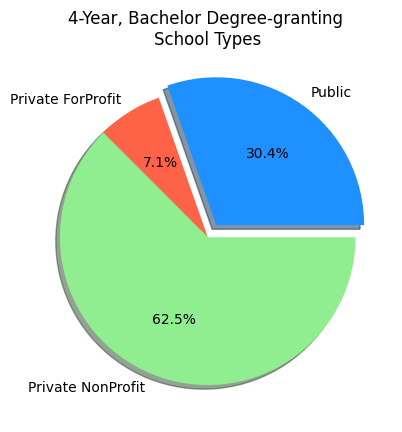

In [0]:
school_type_df = SQLOutput.toPandas()
school_type_df.set_index('School Ownership',inplace=True)
plt.pie(school_type_df.Counts,
       labels=school_type_df.index,
       explode=(0.1,0,0),
        colors=["dodgerblue","tomato","lightgreen"],
       shadow=True,
       autopct="%1.1f%%")
plt.title("4-Year, Bachelor Degree-granting \nSchool Types")
plt.show()

Top five schools by lowest admission rate where admission rate is not null and not 0

In [0]:
SQLCMD  = " SELECT"
SQLCMD += "  `School ID`"
SQLCMD += "  ,`School Name`"
SQLCMD += "  ,`School State`"
SQLCMD += "  ,`School Ownership`"
SQLCMD += "  ,`Admission Rate (%)`"
SQLCMD += "  ,`Mean Earnings (10 Yrs after Entry)`"
SQLCMD += "  ,`Mean Earnings (6 Yrs after Entry)`"
SQLCMD += " FROM"
SQLCMD += "  sDF"
SQLCMD += " WHERE"
SQLCMD += "  `Admission Rate (%)` is not NULL"
SQLCMD += "  and `Admission Rate (%)` <> 0"
SQLCMD += " ORDER BY"
SQLCMD += "  `Admission Rate (%)` ASC"
SQLCMD += " LIMIT 5"

SQLOutput = spark.sql(SQLCMD)
display(SQLOutput)

School ID,School Name,School State,School Ownership,Admission Rate (%),Mean Earnings (10 Yrs after Entry),Mean Earnings (6 Yrs after Entry)
484844,Minerva University,CA,Private NonProfit,1.0,0,0
110404,California Institute of Technology,CA,Private NonProfit,2.69,106300,68500
166027,Harvard University,MA,Private NonProfit,3.2399999999999998,139100,91300
243744,Stanford University,CA,Private NonProfit,3.6799999999999997,141300,92800
190150,Columbia University in the City of New York,NY,Private NonProfit,3.95,115600,77900


Highest admisson rate schools - where admission rate is 100

In [0]:
SQLCMD  = " SELECT"
SQLCMD += "  `School ID`"
SQLCMD += "  ,`School Name`"
SQLCMD += "  ,`School State`"
SQLCMD += "  ,`School Ownership`"
SQLCMD += "  ,`Admission Rate (%)`"
SQLCMD += "  ,`Mean Earnings (10 Yrs after Entry)`"
SQLCMD += "  ,`Mean Earnings (6 Yrs after Entry)`"
SQLCMD += " FROM"
SQLCMD += "  sDF"
SQLCMD += " WHERE"
SQLCMD += "  `Admission Rate (%)` = 100"
SQLCMD += " ORDER BY"
SQLCMD += "  `Admission Rate (%)` ASC"

SQLOutput = spark.sql(SQLCMD)
display(SQLOutput)

School ID,School Name,School State,School Ownership,Admission Rate (%),Mean Earnings (10 Yrs after Entry),Mean Earnings (6 Yrs after Entry)
101453,Heritage Christian University,AL,Private NonProfit,100.0,0,0
102395,United States Sports Academy,AL,Private NonProfit,100.0,0,35700
113582,Design Institute of San Diego,CA,Private ForProfit,100.0,42300,33700
123280,Shasta Bible College and Graduate School,CA,Private NonProfit,100.0,0,0
127653,Naropa University,CO,Private NonProfit,100.0,27800,19600
128586,Bais Binyomin Academy,NY,Private NonProfit,100.0,0,0
137272,St. John Vianney College Seminary,FL,Private NonProfit,100.0,0,0
142090,Boise Bible College,ID,Private NonProfit,100.0,32700,26900
142957,American Islamic College,IL,Private NonProfit,100.0,0,0
149639,VanderCook College of Music,IL,Private NonProfit,100.0,0,0


In [0]:
SQLCMD  = " SELECT"
SQLCMD += "  `Full-time Faculty Rate (%)`"
SQLCMD += "  ,`Faculty's average salary per month`"
SQLCMD += "  ,`Mean Earnings (10 Yrs after Entry)`"
SQLCMD += " FROM"
SQLCMD += "  sDF"
SQLCMD += " WHERE"
SQLCMD += "  `Full-time Faculty Rate (%)` is not NULL"
SQLCMD += "  and `Full-time Faculty Rate (%)` > 0"
SQLCMD += "  and `Faculty's average salary per month` is not NULL"
SQLCMD += "  and `Faculty's average salary per month` > 0"
SQLCMD += "  and `Mean Earnings (10 Yrs after Entry)` is not NULL"
SQLCMD += "  and `Mean Earnings (10 Yrs after Entry)` > 0"

SQLOutput = spark.sql(SQLCMD)

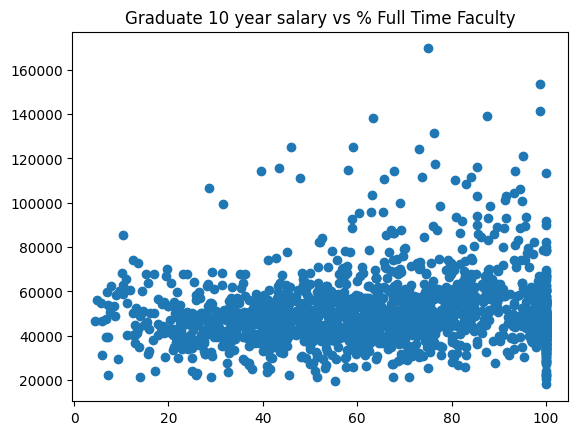

In [0]:
school_scatter_df = SQLOutput.toPandas()
plt.scatter(x=school_scatter_df["Full-time Faculty Rate (%)"],
       y=school_scatter_df["Mean Earnings (10 Yrs after Entry)"])
plt.title("Graduate 10 year salary vs % Full Time Faculty")
plt.show()

It does not appear that the percent of faculty that are full time has an impact on earnings ten years after start.

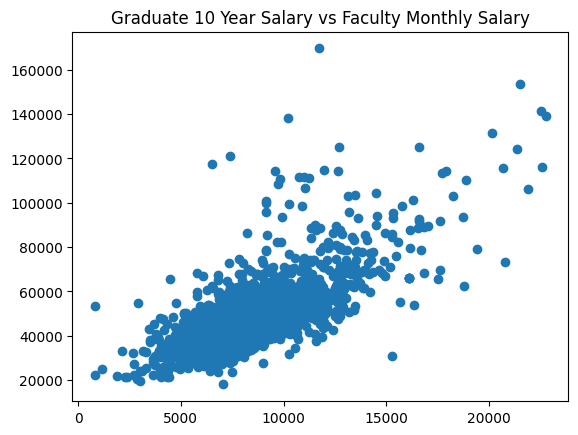

In [0]:
school_scatter_df = SQLOutput.toPandas()
plt.scatter(x=school_scatter_df["Faculty's average salary per month"],
       y=school_scatter_df["Mean Earnings (10 Yrs after Entry)"])
plt.title("Graduate 10 Year Salary vs Faculty Monthly Salary")
plt.show()

This graph shows that for schools that pay higher slaries to their professors, the graduates earm more after 10 years.

Some names seem to be a problem. So, I will rename them here.

In [0]:
SQLCMD  = " SELECT"
SQLCMD += "  `Full-time Faculty Rate (%)` as FTFRP"
SQLCMD += "  ,`Faculty's average salary per month` as FASPM"
SQLCMD += "  ,`Mean Earnings (10 Yrs after Entry)` as ME10YAE"
SQLCMD += "  ,`Admission Rate (%)` as ARP"
SQLCMD += "  ,`Attendance Cost per Academic Year` as ACPAY"
SQLCMD += " FROM"
SQLCMD += "  sDF"
SQLCMD += " WHERE"
SQLCMD += "  `Full-time Faculty Rate (%)` is not NULL"
SQLCMD += "  and `Full-time Faculty Rate (%)` > 0"
SQLCMD += "  and `Faculty's average salary per month` is not NULL"
SQLCMD += "  and `Faculty's average salary per month` > 0"
SQLCMD += "  and `Mean Earnings (10 Yrs after Entry)` is not NULL"
SQLCMD += "  and `Mean Earnings (10 Yrs after Entry)` > 0"
SQLCMD += "  and `Admission Rate (%)` is not NULL"
SQLCMD += "  and `Admission Rate (%)` > 0"
SQLCMD += "  and `Attendance Cost per Academic Year` is not NULL"
SQLCMD += "  and `Attendance Cost per Academic Year` > 0"

ModelData = spark.sql(SQLCMD)

# Create a regression model to predict 10 year salary

Train test split

In [0]:
trainDF, testDF = ModelData.randomSplit([.8, .2], seed=42)
print(f"There are {trainDF.cache().count()} rows in the training set, and {testDF.cache().count()} in the test set")

There are 1144 rows in the training set, and 291 in the test set


In [0]:
from pyspark.ml.feature import VectorAssembler

#vecAssembler = VectorAssembler(inputCols=["Admission Rate (%)","Attendance Cost per Academic Year","Full-time Faculty Rate (%)","Faculty's average salary per month"], outputCol="features")
vecAssembler = VectorAssembler(inputCols=["ARP","ACPAY","FTFRP","FASPM"], outputCol="features")

vecTrainDF = vecAssembler.transform(trainDF)

#vecTrainDF.select("ARP", "features", "ME10YAE").show(10)

In [0]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="ME10YAE")
lrModel = lr.fit(vecTrainDF)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

In [0]:
trainingSummary = lrModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 8605.363236
r2: 0.641373


In [0]:
trainDF.describe().show()

+-------+-----------------+------------------+------------------+-----------------+------------------+
|summary|            FTFRP|             FASPM|           ME10YAE|              ARP|             ACPAY|
+-------+-----------------+------------------+------------------+-----------------+------------------+
|  count|             1144|              1144|              1144|             1144|              1144|
|   mean|66.69182692307693| 8778.506993006993| 50766.17132867133| 72.4383041958042|40734.230769230766|
| stddev|24.52022257305458|2769.8665219433183|14375.986126331614|21.28568513161914| 18002.87728051117|
|    min|             5.88|            2718.0|             18000|             2.69|              8060|
|    max|            100.0|           22761.0|            153600|            100.0|             84126|
+-------+-----------------+------------------+------------------+-----------------+------------------+



Looking at the RMSE and R2, this model does not predict 10 Year Salary very well. It only explains 64% of the variability in the salary and the error is a high percentage of the mean.

Create a pipeline so we can run the test data through the same process.

In [0]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[vecAssembler, lr])
pipelineModel = pipeline.fit(trainDF)

Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

Run the test data split through the same process to create the predictions.

In [0]:
predDF = pipelineModel.transform(testDF)

DataFrame[FTFRP: double, FASPM: double, ME10YAE: bigint, ARP: double, ACPAY: bigint, features: vector, prediction: double]


In [0]:
Calculate the R2 for the test data.

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction",labelCol="ME10YAE",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(predDF))

R Squared (R2) on test data = 0.691431


The R2 on the test data is slightly but not materiall better than the R2 on the training data.